<a href="https://colab.research.google.com/github/georges-17/Unemployment-Rates-in-the-USA-/blob/main/Analysis_of_unemployment_data_in_the_us.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unemployment Rates in the USA

This a Data Analysis project, where I used the Fred API to extract data about unemployment in the USA. FRED stands for the Federal Reserve Economic Data, which I extracted, cleaned, and wrangled data, to be able to visualize and understand the job market and what it can affect in the us.

# Importing and installing the neccessary libaries



In [179]:
!pip install fredapi

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express  as px

plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns", 500)
color_palette = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred
#key is available at fred website api key, available upon request

from google.colab import userdata
fred_key = userdata.get('fred_key')

# Getting the *Data*


*   Creating Fred object to pull data
*   Loading data



In [181]:
fred = Fred(api_key = fred_key)

In [182]:
sp = fred.search("S&P", order_by = "popularity")

In [183]:
sp.shape

(1000, 15)

In [184]:
sp

id realtime_start realtime_end  \
series id                                                              
BAMLH0A0HYM2                BAMLH0A0HYM2     2024-02-02   2024-02-02   
CSUSHPINSA                    CSUSHPINSA     2024-02-02   2024-02-02   
SP500                              SP500     2024-02-02   2024-02-02   
MEHOINUSA672N              MEHOINUSA672N     2024-02-02   2024-02-02   
BAMLH0A0HYM2EY            BAMLH0A0HYM2EY     2024-02-02   2024-02-02   
...                                  ...            ...          ...   
S1501ACSTOTAL055095  S1501ACSTOTAL055095     2024-02-02   2024-02-02   
CKSPPPITA666NRUG        CKSPPPITA666NRUG     2024-02-02   2024-02-02   
SDXRLTSA                        SDXRLTSA     2024-02-02   2024-02-02   
RGDPNACYA666NRUG        RGDPNACYA666NRUG     2024-02-02   2024-02-02   
RKNANPPLA666NRUG        RKNANPPLA666NRUG     2024-02-02   2024-02-02   

                                                                 title  \
series id                                                                
BAMLH0A0HYM2         ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA           S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                          S&P 500   
MEHOINUSA672N        Real Median Household Income in the United States   
BAMLH0A0HYM2EY            ICE BofA US High Yield Index Effective Yield   
...                                                                ...   
S1501ACSTOTAL055095  People 25 Years and Over Who Have Completed an...   
CKSPPPITA666NRUG     Capital stock at Current Purchasing Power Pari...   
SDXRLTSA             Home Price Index (Low Tier) for San Diego, Cal...   
RGDPNACYA666NRUG       Real GDP at Constant National Prices for Cyprus   
RKNANPPLA666NRUG     Capital Stock at Constant National Prices for ...   

                    observation_start observation_end     frequency  \
series id                                                             
BAMLH0A0HYM2               1996-12-31      2024-01-31  Daily, Close   
CSUSHPINSA                 1987-01-01      2023-11-01       Monthly   
SP500                      2014-02-03      2024-02-01  Daily, Close   
MEHOINUSA672N              1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY             1996-12-31      2024-01-31  Daily, Close   
...                               ...             ...           ...   
S1501ACSTOTAL055095        2009-01-01      2022-01-01        Annual   
CKSPPPITA666NRUG           1950-01-01      2019-01-01        Annual   
SDXRLTSA                   1989-01-01      2023-11-01       Monthly   
RGDPNACYA666NRUG           1950-01-01      2019-01-01        Annual   
RKNANPPLA666NRUG           1970-01-01      2019-01-01        Annual   

                    frequency_short                           units  \
series id                                                             
BAMLH0A0HYM2                      D                         Percent   
CSUSHPINSA                        M              Index Jan 2000=100   
SP500                             D                           Index   
MEHOINUSA672N                     A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY                    D                         Percent   
...                             ...                             ...   
S1501ACSTOTAL055095               A                         Percent   
CKSPPPITA666NRUG                  A   Millions of 2017 U.S. Dollars   
SDXRLTSA                          M              Index Jan 2000=100   
RGDPNACYA666NRUG                  A   Millions of 2017 U.S. Dollars   
RKNANPPLA666NRUG                  A   Millions of 2017 U.S. Dollars   

                                  units_short      seasonal_adjustment  \
series id                                                                
BAMLH0A0HYM2                                %  Not Seasonally Adjusted   
CSUSHPINSA                 Index Jan 2000=100  Not Seasonally Adjust

# Pull Raw Data

In [185]:
sp4 =fred.get_series(series_id="SP500")

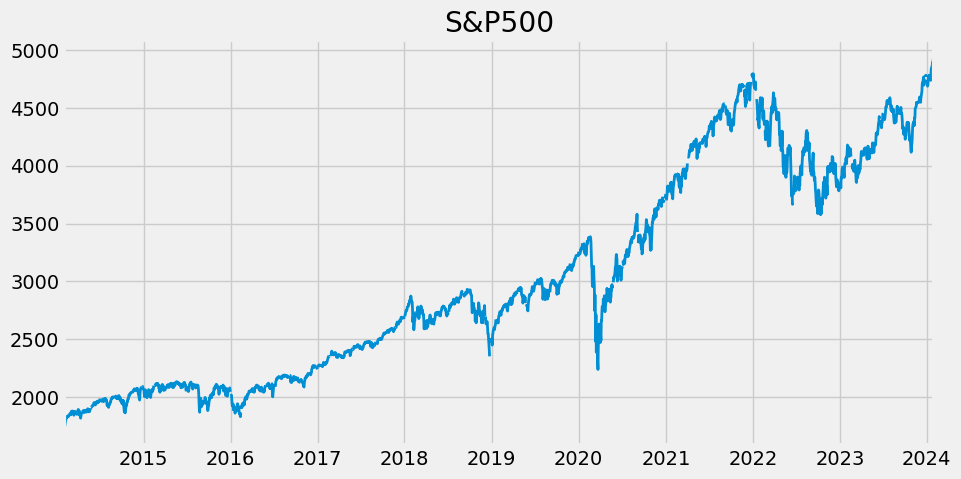

In [186]:
sp4.plot(figsize=(10,5), title ="S&P500", lw =2);

In [187]:
unemp_res = fred.search("unemployment")

In [188]:
unemp_res

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-02-02   2024-02-02   
UNRATENSA                          UNRATENSA     2024-02-02   2024-02-02   
CCSA                                    CCSA     2024-02-02   2024-02-02   
CCNSA                                  CCNSA     2024-02-02   2024-02-02   
UNEMPLOY                            UNEMPLOY     2024-02-02   2024-02-02   
...                                      ...            ...          ...   
LAUCN080690000000003A  LAUCN080690000000003A     2024-02-02   2024-02-02   
LAUCN420450000000003A  LAUCN420450000000003A     2024-02-02   2024-02-02   
ARBEURN                              ARBEURN     2024-02-02   2024-02-02   
LAUCN133130000000003A  LAUCN133130000000003A     2024-02-02   2024-02-02   
LAUCN080010000000003A  LAUCN080010000000003A     2024-02-02   2024-02-02   

                                                           title  \
series id                                                          
UNRATE                                         Unemployment Rate   
UNRATENSA                                      Unemployment Rate   
CCSA                     Continued Claims (Insured Unemployment)   
CCNSA                    Continued Claims (Insured Unemployment)   
UNEMPLOY                                      Unemployment Level   
...                                                          ...   
LAUCN080690000000003A    Unemployment Rate in Larimer County, CO   
LAUCN420450000000003A   Unemployment Rate in Delaware County, PA   
ARBEURN                   Unemployment Rate in Benton County, AR   
LAUCN133130000000003A  Unemployment Rate in Whitfield County, GA   
LAUCN080010000000003A      Unemployment Rate in Adams County, CO   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-01-01   
UNRATENSA                    1948-01-01      2024-01-01   
CCSA                         1967-01-07      2024-01-20   
CCNSA                        1967-01-07      2024-01-20   
UNEMPLOY                     1948-01-01      2024-01-01   
...                                 ...             ...   
LAUCN080690000000003A        1990-01-01      2022-01-01   
LAUCN420450000000003A        1990-01-01      2022-01-01   
ARBEURN                      1990-01-01      2023-11-01   
LAUCN133130000000003A        1990-01-01      2022-01-01   
LAUCN080010000000003A        1990-01-01      2022-01-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
CCSA                   Weekly, Ending Saturday               W   
CCNSA                  Weekly, Ending Saturday               W   
UNEMPLOY                               Monthly               M   
...                                        ...             ...   
LAUCN080690000000003A                   Annual               A   
LAUCN420450000000003A                   Annual               A   
ARBEURN                                Monthly               M   
LAUCN133130000000003A                   Annual               A   
LAUCN080010000000003A                   Annual               A   

                                      units        units_short  \
series id                                                        
UNRATE                              Percent                  %   
UNRATENSA                           Percent                  %   
CCSA                                 Number             Number   
CCNSA                                Number             Number   
UNEMPLOY               Thousands of Persons  Thous. of Persons   
...                                     ...                ...   
LAUCN08069000

In [189]:
ur = fred.get_series('UNRATE')

<Axes: >

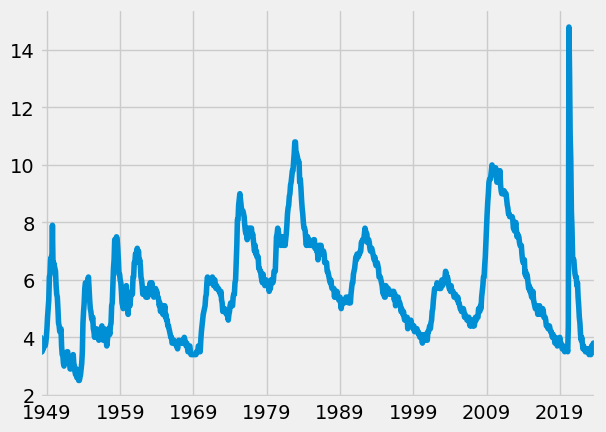

In [190]:
ur.plot()

In [191]:
hs = fred.search('unemployment rate state', filter =('frequency','Monthly'))
hs

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2024-02-02   2024-02-02   
UNRATENSA      UNRATENSA     2024-02-02   2024-02-02   
UNEMPLOY        UNEMPLOY     2024-02-02   2024-02-02   
LNS14000006  LNS14000006     2024-02-02   2024-02-02   
LNU04000006  LNU04000006     2024-02-02   2024-02-02   
...                  ...            ...          ...   
LAPOIN7URN    LAPOIN7URN     2024-02-02   2024-02-02   
OKCREE5URN    OKCREE5URN     2024-02-02   2024-02-02   
LAFA118URN    LAFA118URN     2024-02-02   2024-02-02   
ATHE013URN    ATHE013URN     2024-02-02   2024-02-02   
MIMACO9URN    MIMACO9URN     2024-02-02   2024-02-02   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
UNRATENSA                                    Unemployment Rate   
UNEMPLOY                                    Unemployment Level   
LNS14000006      Unemployment Rate - Black or African American   
LNU04000006      Unemployment Rate - Black or African American   
...                                                        ...   
LAPOIN7URN       Unemployment Rate in Pointe Coupee Parish, LA   
OKCREE5URN               Unemployment Rate in Creek County, OK   
LAFA118URN   Unemployment Rate in Lafayette-West Lafayette,...   
ATHE013URN   Unemployment Rate in Athens-Clarke County, GA ...   
MIMACO9URN              Unemployment Rate in Macomb County, MI   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
UNRATE             1948-01-01      2024-01-01   Monthly               M   
UNRATENSA          1948-01-01      2024-01-01   Monthly               M   
UNEMPLOY           1948-01-01      2024-01-01   Monthly               M   
LNS14000006        1972-01-01      2024-01-01   Monthly               M   
LNU04000006        1972-01-01      2024-01-01   Monthly               M   
...                       ...             ...       ...             ...   
LAPOIN7URN         1990-01-01      2023-11-01   Monthly               M   
OKCREE5URN         1990-01-01      2023-11-01   Monthly               M   
LAFA118URN         1990-01-01      2023-11-01   Monthly               M   
ATHE013URN         1990-01-01      2023-11-01   Monthly               M   
MIMACO9URN         1990-01-01      2023-11-01   Monthly               M   

                            units        units_short      seasonal_adjustment  \
series id                                                                       
UNRATE                    Percent                  %      Seasonally Adjusted   
UNRATENSA                 Percent                  %  Not Seasonally Adjusted   
UNEMPLOY     Thousands of Persons  Thous. of Persons      Seasonally Adjusted   
LNS14000006               Percent                  %      Seasonally Adjusted   
LNU04000006               Percent                  %  Not Seasonally Adjusted   
...                           ...                ...                      ...   
LAPOIN7URN                Percent                  %  Not Seasonally Adjusted   
OKCREE5URN                Percent                  %  Not Seasonally Adjusted   
LAFA118URN                Percent                  %  Not Seasonally Adjusted   
ATHE013URN                Percent                  %  Not Seasonally Adjusted   
MIMACO9URN                Percent                  %  Not Seasonally Adjusted   

            seasonal_adjustment_short               last_updated popularity  \
series id                                                                     
UNRATE                             SA  2024-02-02 07:49:02-06:00         94   
UNRATENSA                         NSA  2024-02-02 07:49:06-06:00         56   
UNEMPLOY                           SA  2024-02-02 07:49:03-06:00         69   
LNS140000

In [192]:
hs_df = hs.query('seasonal_adjustment == "Seasonally Adjusted" and units== "Percent" ')

In [193]:
hs_df.shape

(160, 15)

In [194]:
#hs_df = hs_df.loc[hs_df['title'].str.contains('Unemployment Rate state')]
un_df = hs_df.loc[hs_df['title'].str.contains('Unemployment Rate')]
un_df.shape

(97, 15)

In [197]:
import time
all_res =[]
for myid in un_df.index:
  res = fred.get_series(myid)
  res = res.to_frame(name =myid)
  time.sleep(0.1)
  all_res.append(res)

In [198]:
unemp_res=pd.concat(all_res, axis =1)

In [199]:
unemp_res.shape

(1126, 97)

In [127]:
 unemp_state =unemp_res.drop('UNRATE', axis =1)

In [128]:
unemp_state.shape

(1125, 96)

<Axes: >

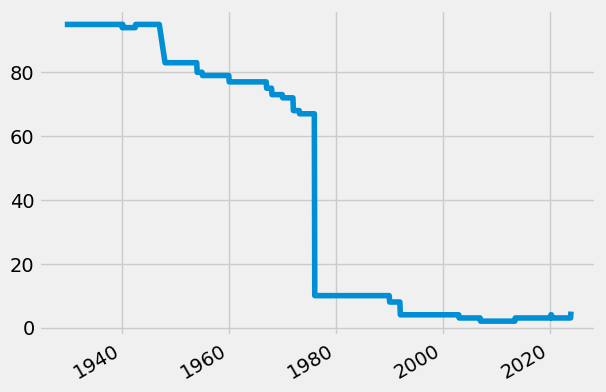

In [200]:
unemp_state.isna().sum(axis=1).plot()

From the above graph , the data contains a lot of noise



In [201]:

df = unemp_state.dropna(axis = 1, how = 'all')
df.shape

(1125, 96)

In [204]:
cols_to_drop = []
for i in unemp_state:
    if len(i) > 4:
        cols_to_drop.append(i)
unemp_re = unemp_state.drop(columns = cols_to_drop, axis=1)


In [206]:
unemp_re.shape

(1125, 52)

In [207]:
unemp_re

CAUR  TXUR  NYUR  FLUR  MIUR  OHUR  PAUR  ALUR  ILUR  NCUR  NJUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-08-01   4.6   4.1   3.9   2.7   3.7   3.4   3.5   2.1   4.1   3.3   4.2   
2023-09-01   4.7   4.1   4.0   2.8   3.9   3.4   3.4   2.2   4.4   3.4   4.4   
2023-10-01   4.8   4.1   4.2   2.8   4.1   3.6   3.4   2.3   4.6   3.4   4.6   
2023-11-01   4.9   4.1   4.3   2.9   4.3   3.6   3.4   2.4   4.7   3.5   4.7   
2023-12-01   5.1   4.0   4.5   3.0   4.3   3.7   3.5   2.6   4.8   3.5   4.8   

            COUR  GAUR  MAUR  WIUR  VAUR  AZUR  TNUR  MNUR  SCUR  ORUR  KYUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-08-01   3.1   3.3   2.6   2.9   2.5   3.8   3.1   3.1   3.0   3.4   4.0   
2023-09-01   3.2   3.4   2.6   3.1   2.5   4.0   3.2   3.1   2.9   3.5   4.1   
2023-10-01   3.3   3.4   2.8   3.2   2.7   4.2   3.3   3.2   2.9   3.6   4.2   
2023-11-01   3.3   3.4   2.9   3.3   2.9   4.3   3.5   3.1   3.0   3.6   4.3   
2023-12-01   3.4   3.4   3.2   3.3   3.0   4.3   3.5   2.9   3.0   3.7   4.3   

            WAUR  IAUR  NVUR  MDUR  INUR  WVUR  ARUR  LAUR  NMUR  UTUR  AKUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-08-01   3.6   2.9   5.4   1.7   3.4   3.6   2.7   3.3   3.7   2.5   3.9   
2023-09-01   3.6   3.0   5.4   1.6   3.6   3.8   2.9   3.3   3.7   2.6   4.1   
2023-10-01   3.8   3.2   5.4   1.7   3.6   4.0   3.1   3.3   3.8   2.7   4.3   
2023-11-01   4.0   3.3   5.4   1.8   3.7   4.2   3.3   3.5   3.9   2.8   4.4   
2023-12-01   4.2   3.2   5.4   1.9   3.6   4.3   3.4   3.7   4.0   2.8   4.5   

            MOUR  OKUR  MSUR  PRUR  NDUR  CTUR  MTUR  HIUR  KSUR  MEUR  NEUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-08-01   2.8   2.8   3.2   6.2   1.9   3.5   2.5   2.8   2.7   2.5   2.0   
2023-09-01   2.9   3.0   3.2   6.0   1.9   3.5   2.7   2.8   2.8   2.7   2.1   
2023-10-01   3.1   3.2   3.3   5.8   1.9   3.5   2.8   2.9   2.9   2.8   2.2   
2023-11-01   3.2   3.3   3.3   5.7   1.9   3.6   3.0   2.9   2.9   3.0   2.3   
2023-12-01   3.3   3.4   3.3   5.7   1.9   3.8   3.2   2.9   2.8   3.2   2.3   

            DCUR  WYUR  IDUR  SDUR  DEUR  RIUR  NHUR  VTUR  
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN

drop all the rows that have null values , make am id to state in the title of each respective state

In [208]:
unemp = unemp_re.dropna()
id_to_state = un_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp.columns = [id_to_state[c] for c in unemp_re.columns]

In [212]:
unemp.shape

(574, 52)

In [226]:
unemp

California  Texas  New York  Florida  Michigan  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7       9.9   8.1   
1976-02-01         9.2    5.8      10.3      9.7       9.9   8.1   
1976-03-01         9.1    5.9      10.2      9.6       9.9   8.1   
1976-04-01         9.1    5.9      10.2      9.5       9.8   8.0   
1976-05-01         9.0    5.9      10.1      9.3       9.6   7.8   
...                ...    ...       ...      ...       ...   ...   
2023-08-01         4.6    4.1       3.9      2.7       3.7   3.4   
2023-09-01         4.7    4.1       4.0      2.8       3.9   3.4   
2023-10-01         4.8    4.1       4.2      2.8       4.1   3.6   
2023-11-01         4.9    4.1       4.3      2.9       4.3   3.6   
2023-12-01         5.1    4.0       4.5      3.0       4.3   3.7   

            Pennsylvania  Alabama  Illinois  North Carolina  New Jersey  \
1976-01-01           8.0      6.6       6.6             6.4        10.3   
1976-02-01           8.1      6.6       6.6             6.4        10.3   
1976-03-01           8.1      6.6       6.6             6.4        10.3   
1976-04-01           8.1      6.5       6.6             6.3        10.3   
1976-05-01           8.1      6.4       6.6             6.1        10.3   
...                  ...      ...       ...             ...         ...   
2023-08-01           3.5      2.1       4.1             3.3         4.2   
2023-09-01           3.4      2.2       4.4             3.4         4.4   
2023-10-01           3.4      2.3       4.6             3.4         4.6   
2023-11-01           3.4      2.4       4.7             3.5         4.7   
2023-12-01           3.5      2.6       4.8             3.5         4.8   

            Colorado  Georgia  Massachusetts  Wisconsin  Virginia  Arizona  \
1976-01-01       5.8      8.4           10.5        5.8       6.1     10.2   
1976-02-01       5.7      8.4           10.5        5.8       6.1     10.2   
1976-03-01       5.7      8.4           10.5        5.7       6.1     10.1   
1976-04-01       5.6      8.3           10.3        5.6       6.0     10.0   
1976-05-01       5.6      8.1           10.1        5.5       5.9      9.8   
...              ...      ...            ...        ...       ...      ...   
2023-08-01       3.1      3.3            2.6        2.9       2.5      3.8   
2023-09-01       3.2      3.4            2.6        3.1       2.5      4.0   
2023-10-01       3.3      3.4            2.8        3.2       2.7      4.2   
2023-11-01       3.3      3.4            2.9        3.3       2.9      4.3   
2023-12-01       3.4      3.4            3.2        3.3       3.0      4.3   

            Tennessee  Minnesota  South Carolina  Oregon  Kentucky  \
1976-01-01        6.0        6.0             7.4     9.5       5.6   
1976-02-01        6.0        6.0             7.4     9.5       5.6   
1976-03-01        6.0        5.9             7.3     9.4       5.6   
1976-04-01        6.0        5.8             7.2     9.2       5.6   
1976-05-01        5.9        5.7             7.0     9.1       5.5   
...               ...        ...             ...     ...       ...   
2023-08-01        3.1        3.1             3.0     3.4       4.0   
2023-09-01        3.2        3.1             2.9     3.5       4.1   
2023-10-01        3.3        3.2             2.9     3.6       4.2   
2023-11-01        3.5        3.1             3.0     3.6       4.3   
2023-12-01        3.5        2.9             3.0     3.7       4.3   

            Washington  Iowa  Nevada  Maryland  Indiana  West Virginia  \
1976-01-01         8.5   4.3     9.2       6.4      6.6            7.5   
1976-02-01         8.5   4.3     9.2       6.4      6.6            7.5   
1976-03-01         8.4   4.3     9.2       6.4      6.5            7.5   
1976-04-01         8.5   4.2     9.0       6.4      6.3            7.5   
1976-05-01         8.5   4.1     8.9       6.5      6.0            7.4   
...                ...   ...     ...       ...      ...            ...  

plot states unemployement rate

In [209]:
px.line(unemp)

# Pull Unemployement rate at diffrent times


# 1- unemployment rates in the US,may-april 2020 , Covid/pandamic



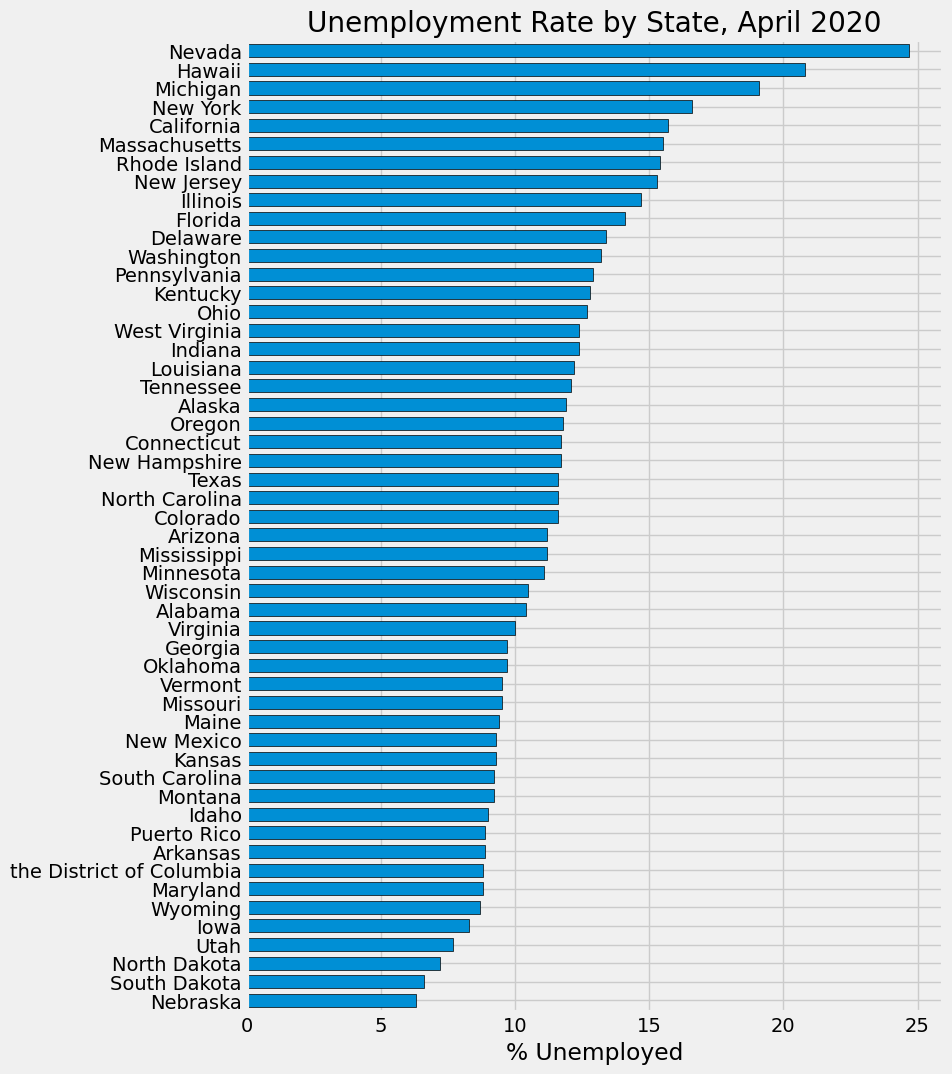

In [229]:
ax = unemp.loc[unemp.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind='barh', figsize=(8,12), width =0.7, edgecolor ='black',
          title = 'Unemployment Rate by State, April 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# 2-Unemployment Rates in th 2008 recession, from december 2007 till june 2008


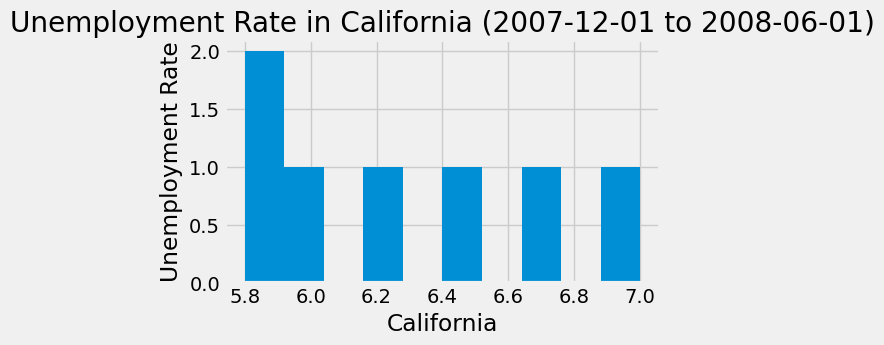

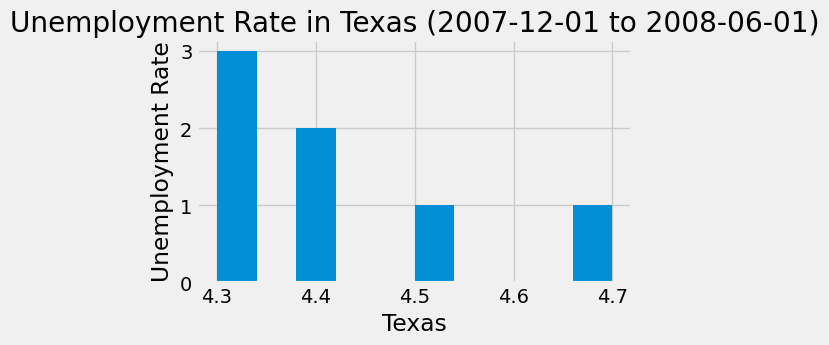

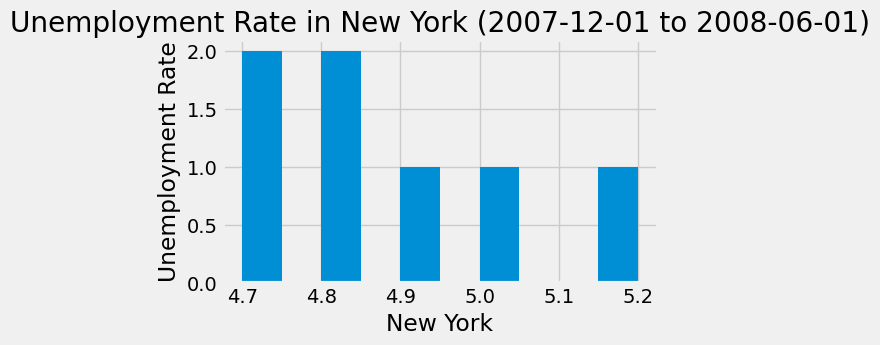

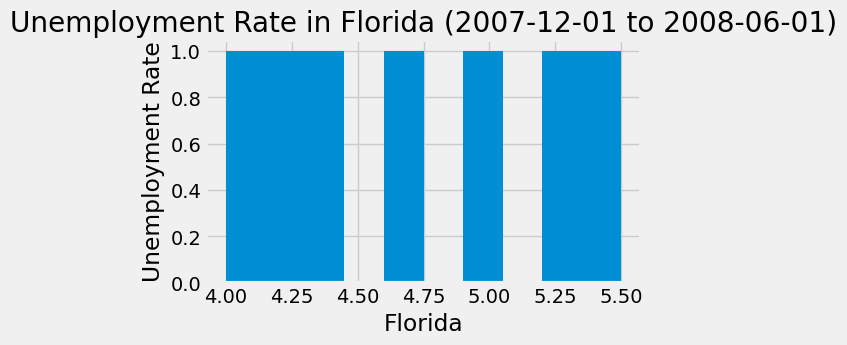

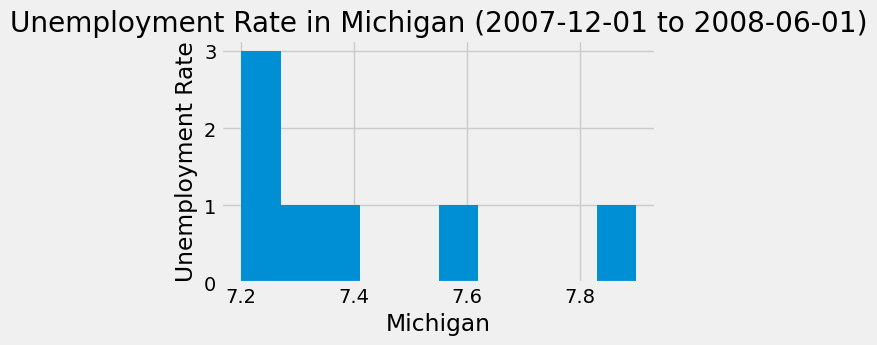

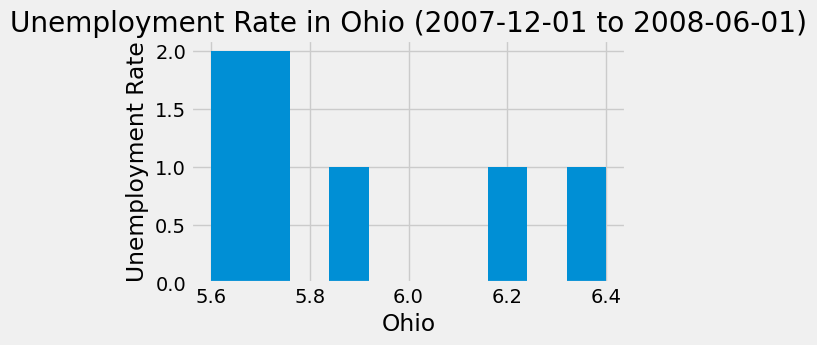

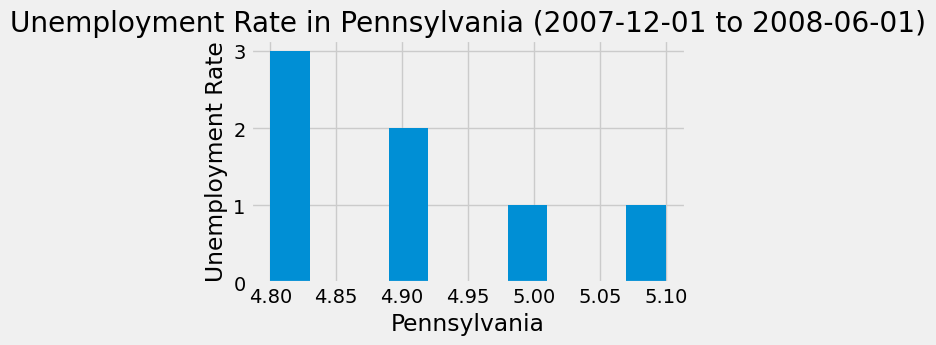

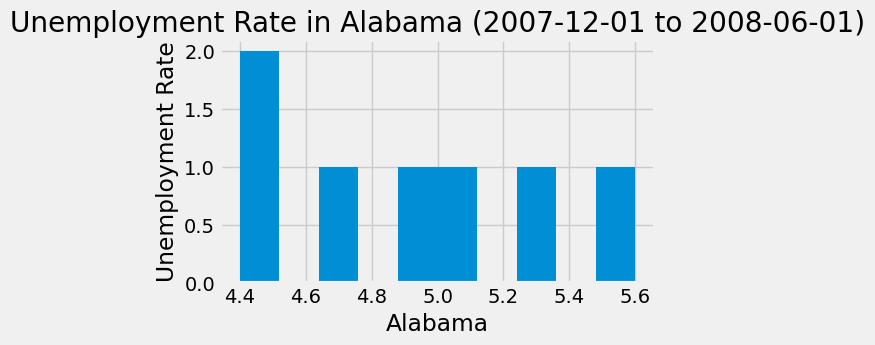

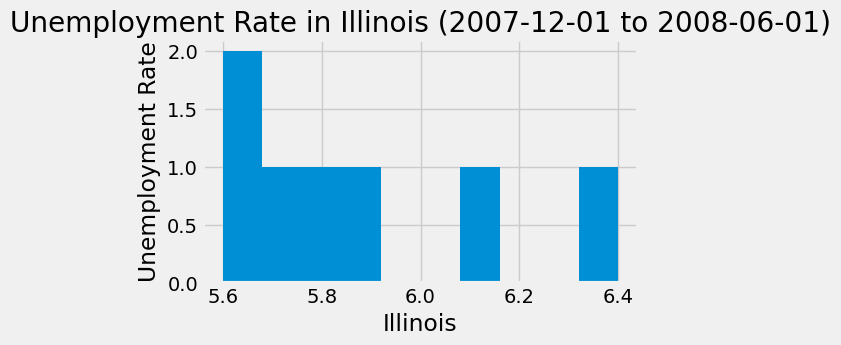

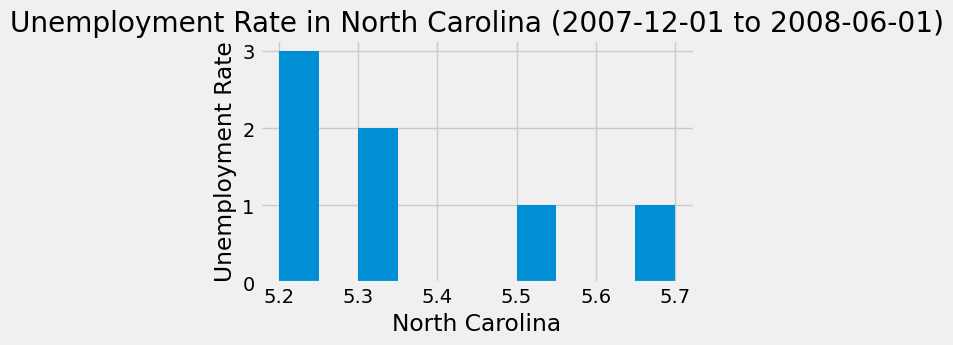

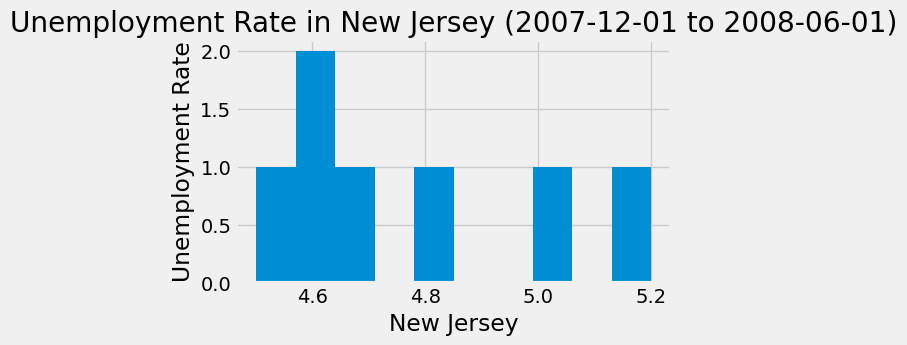

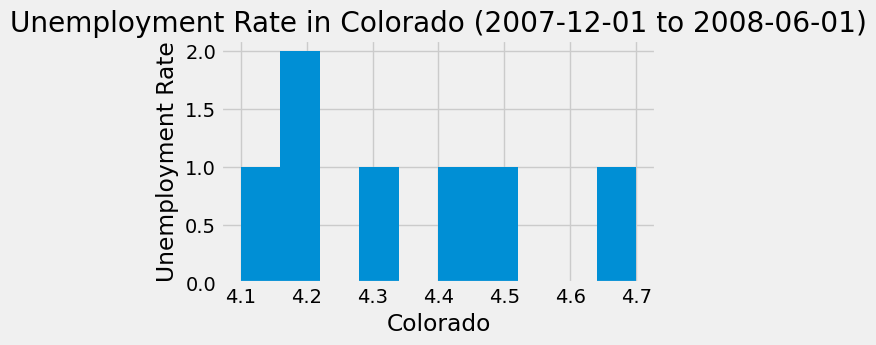

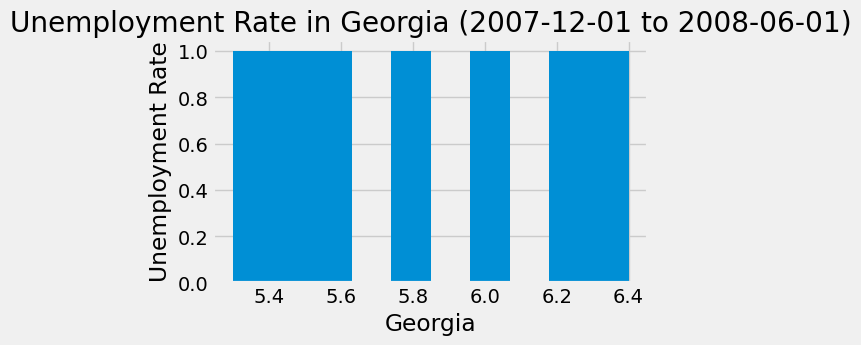

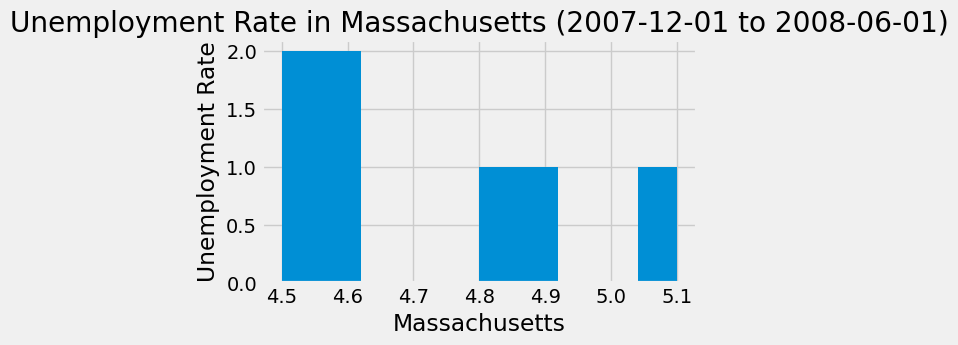

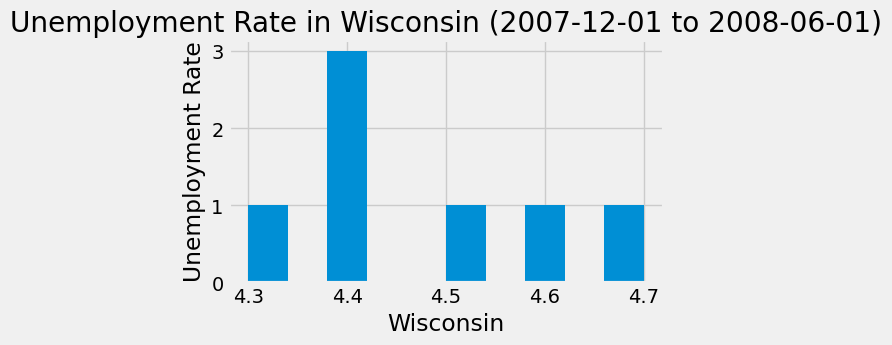

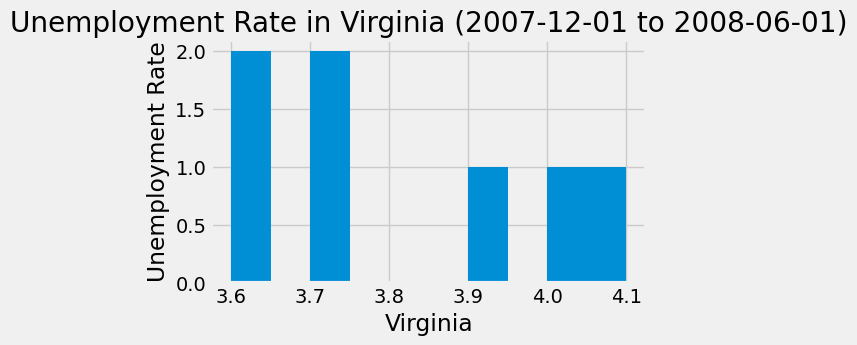

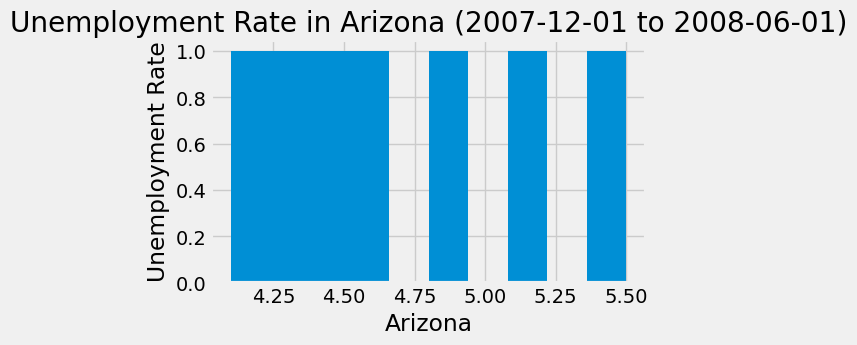

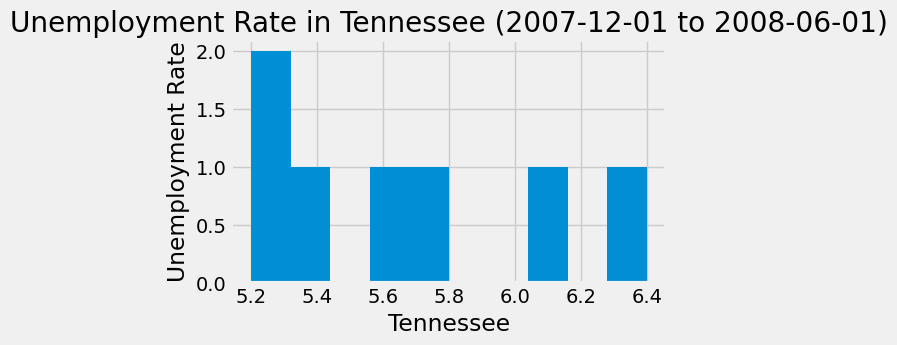

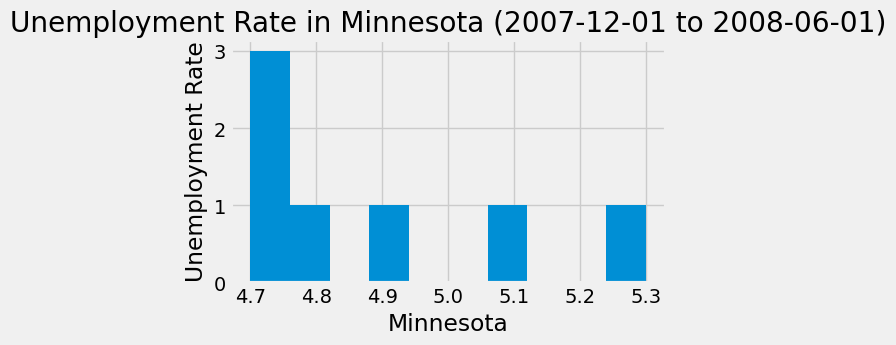

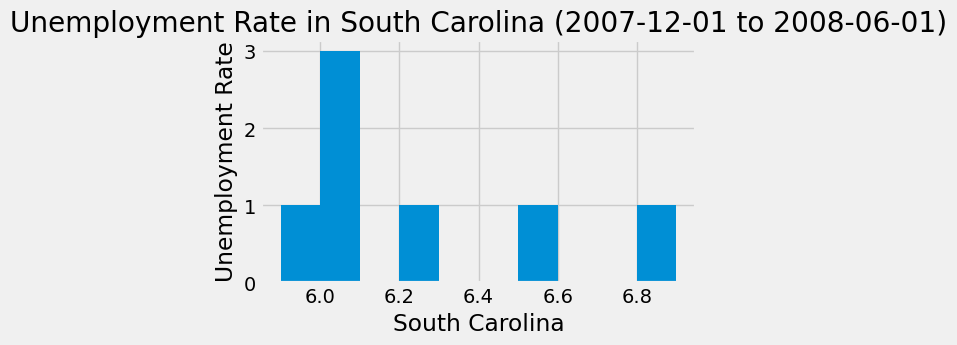

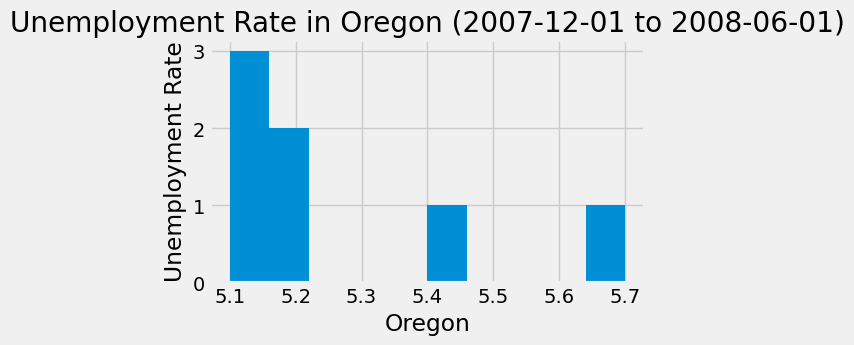

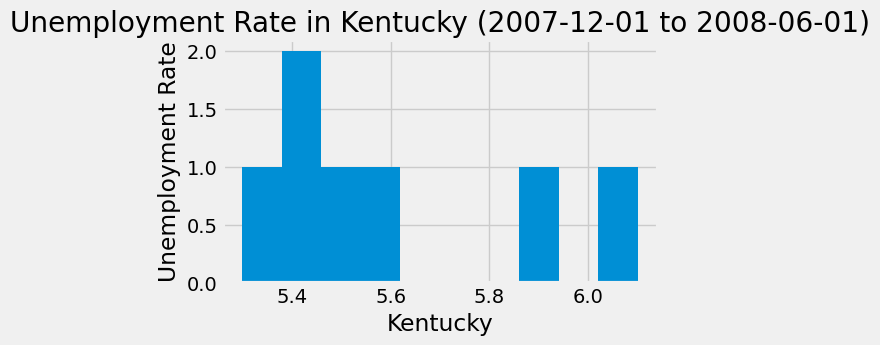

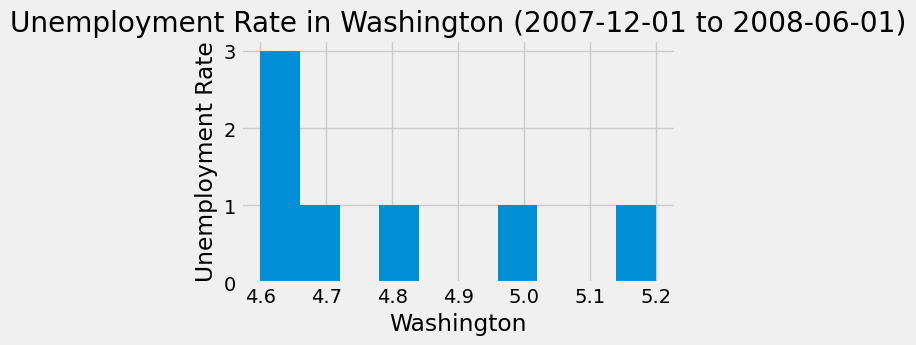

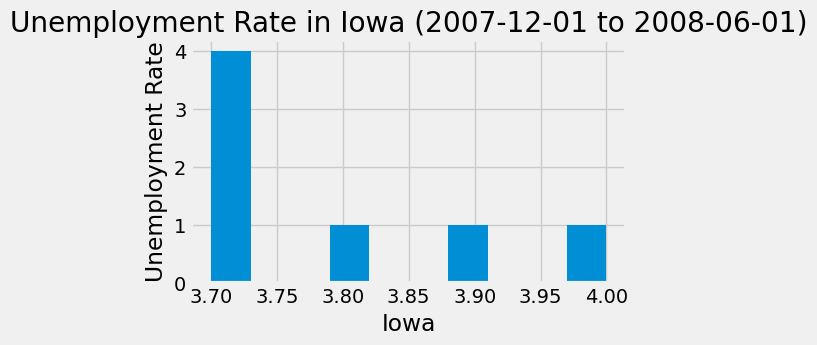

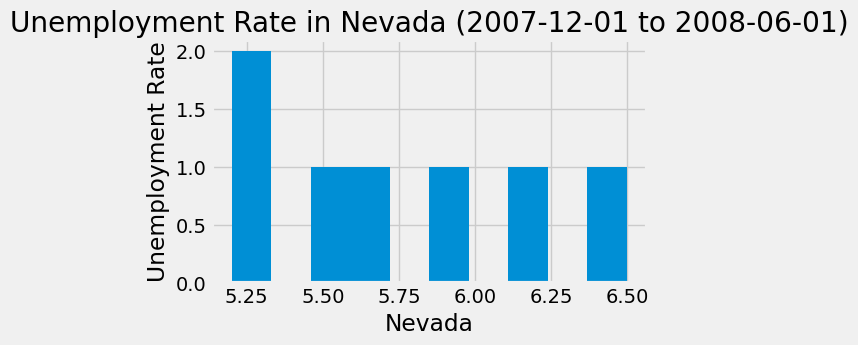

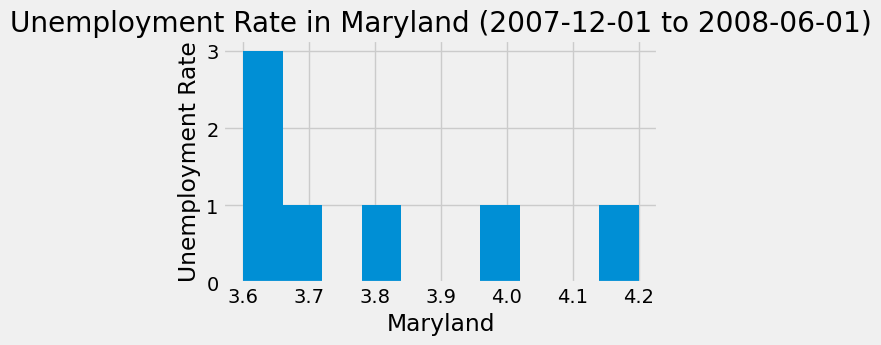

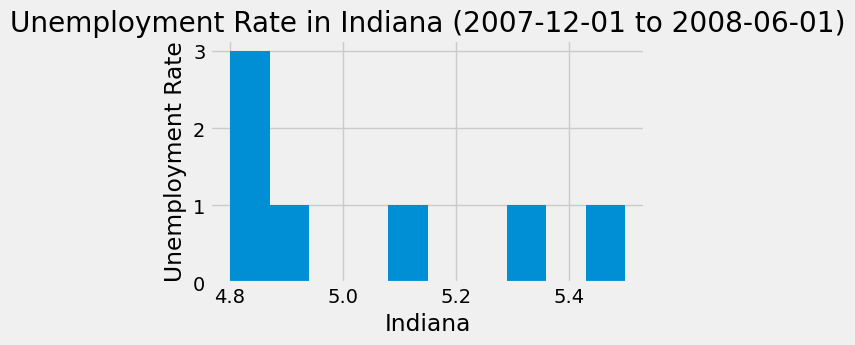

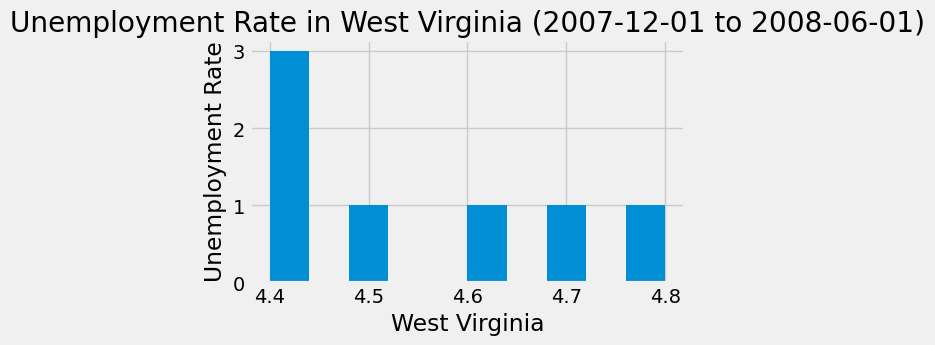

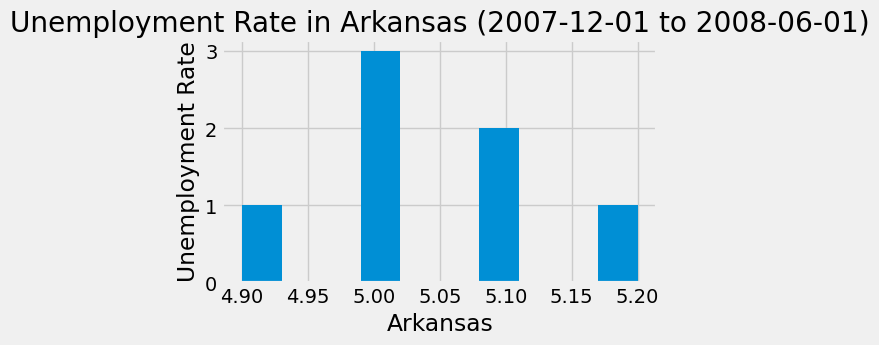

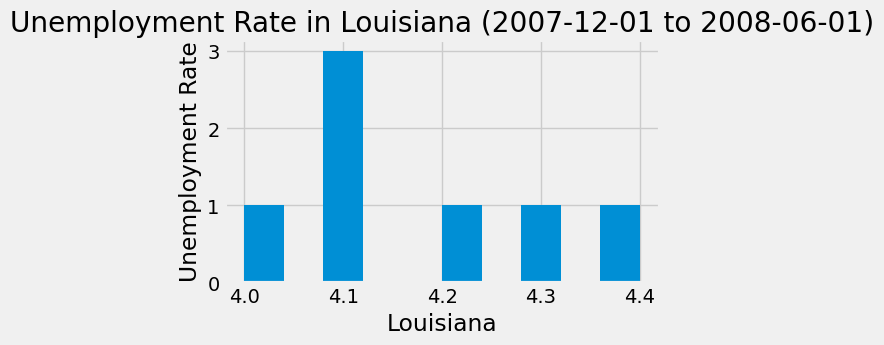

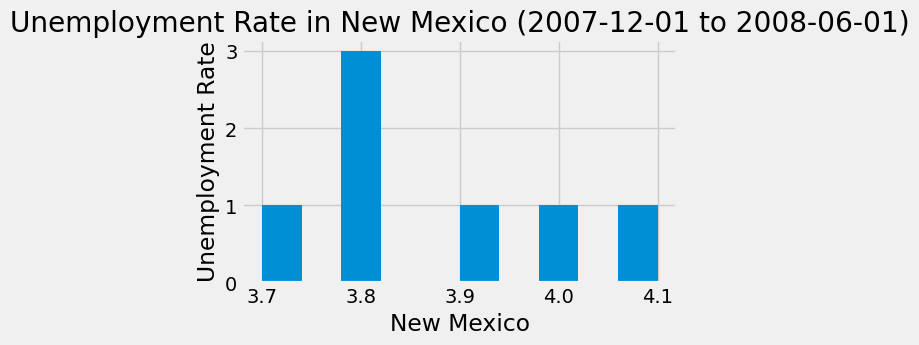

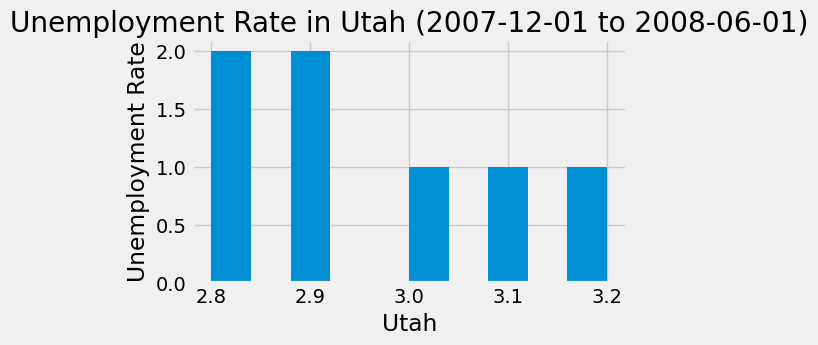

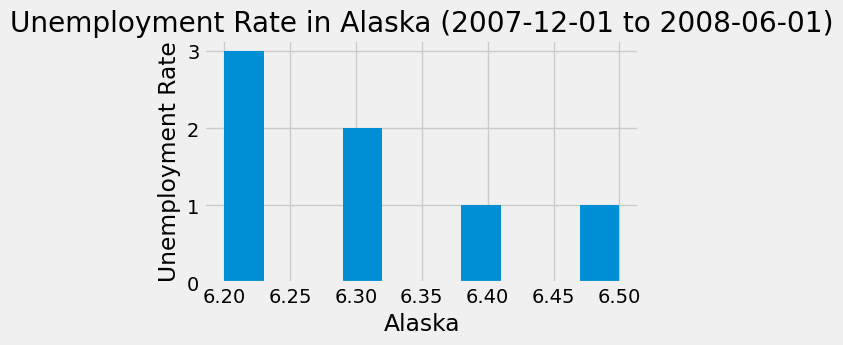

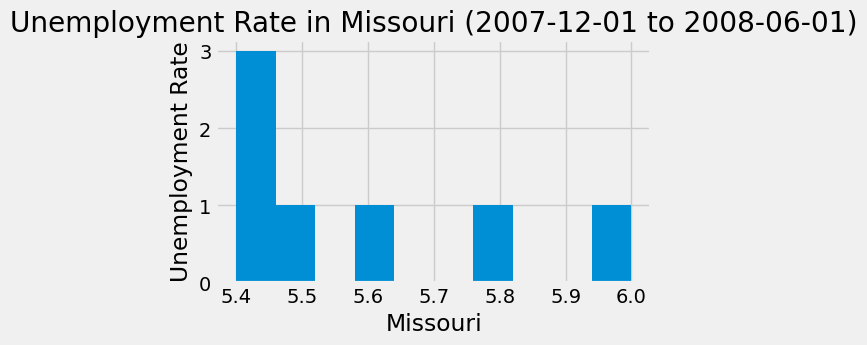

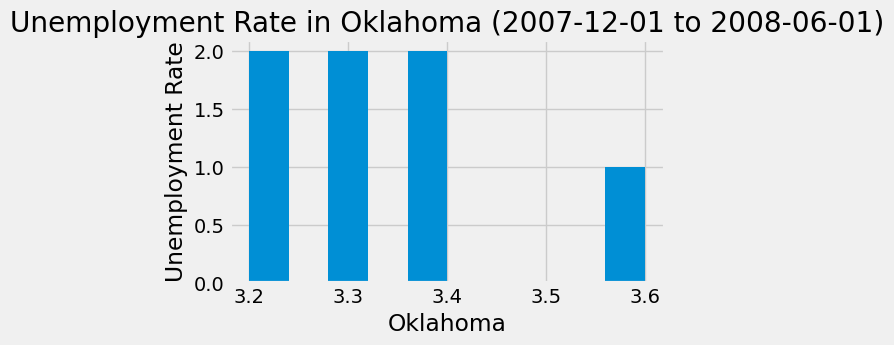

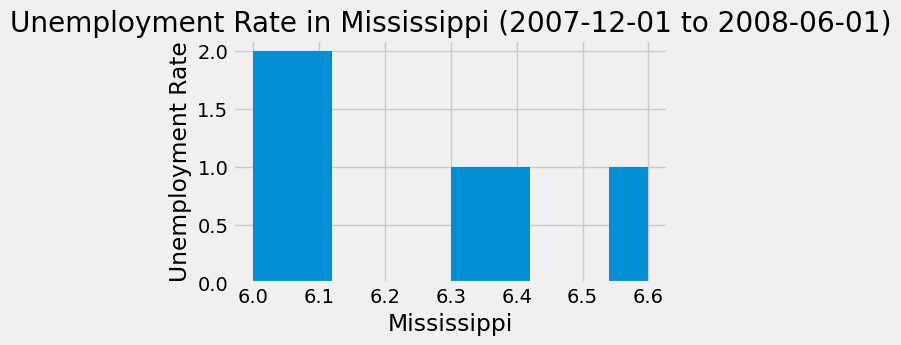

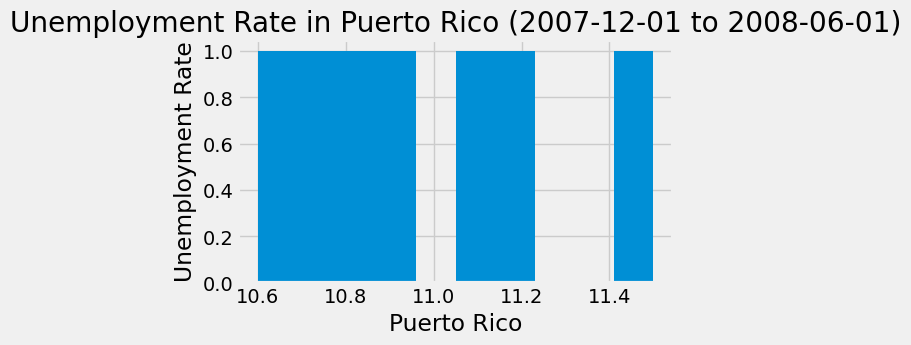

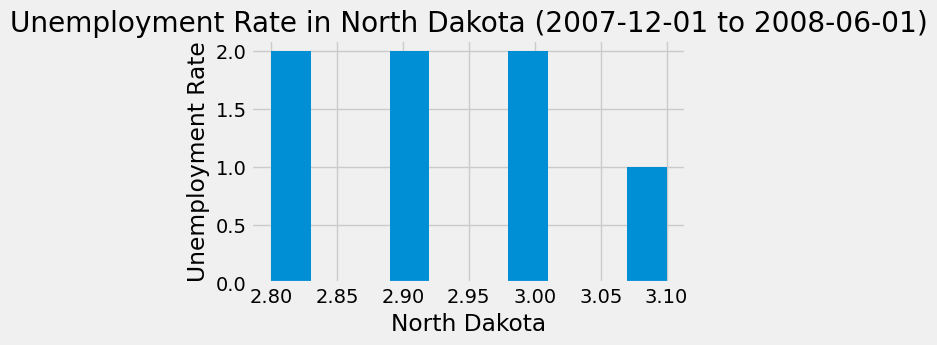

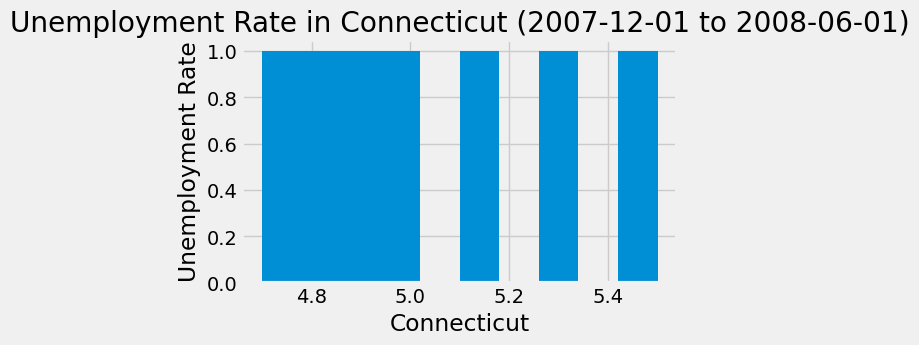

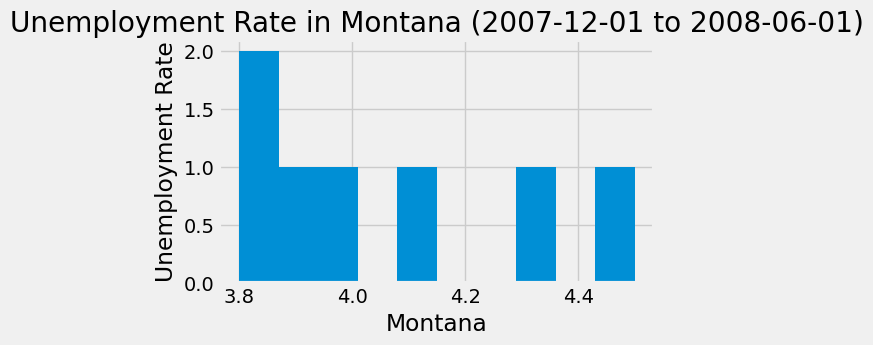

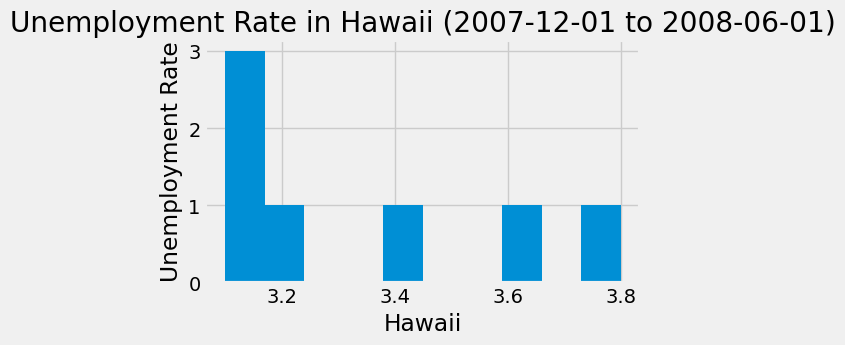

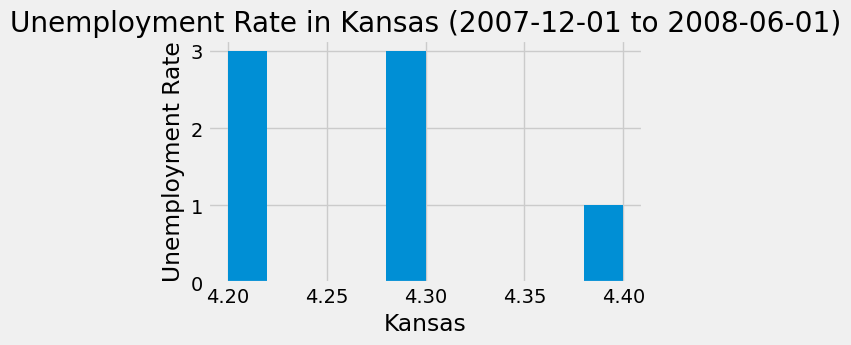

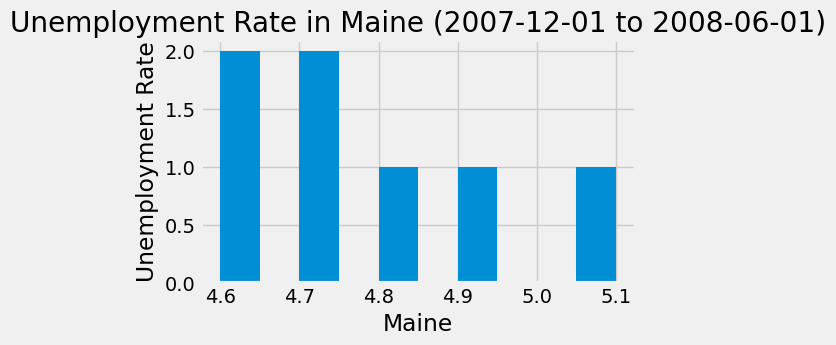

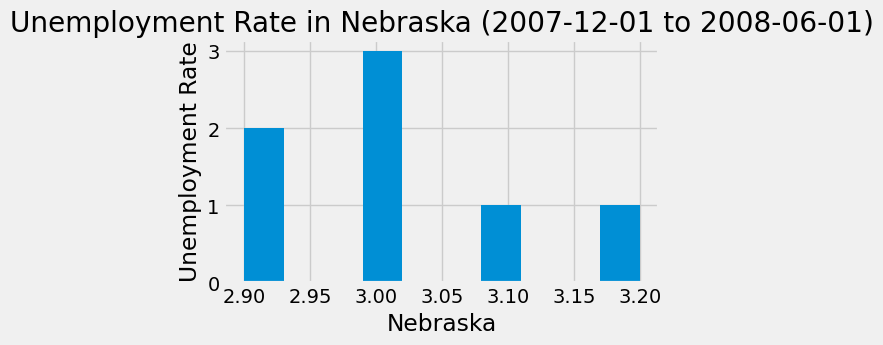

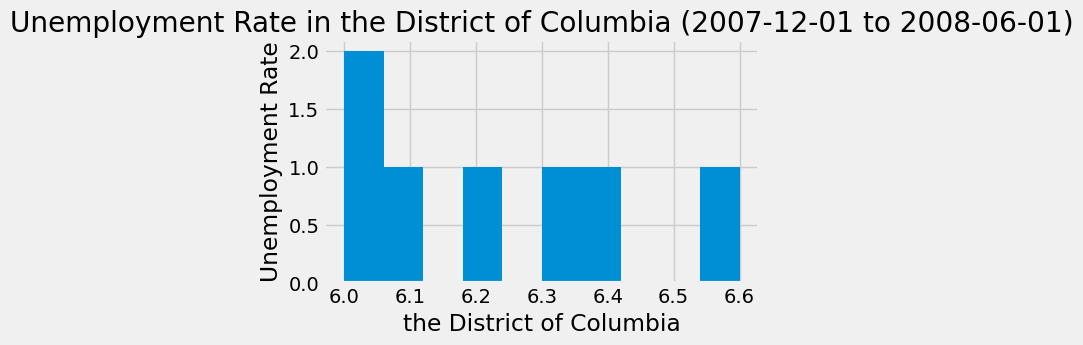

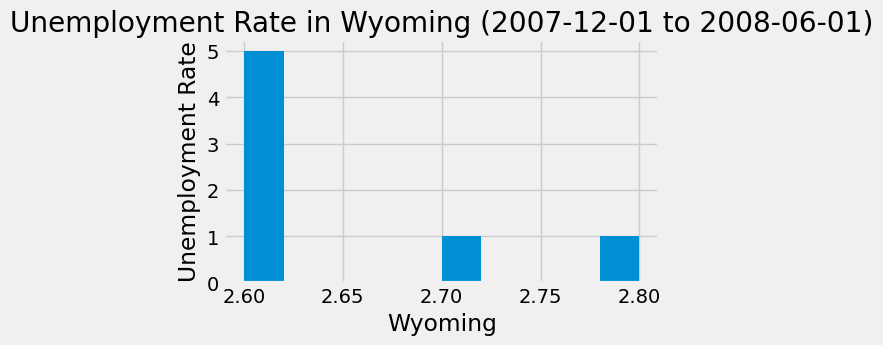

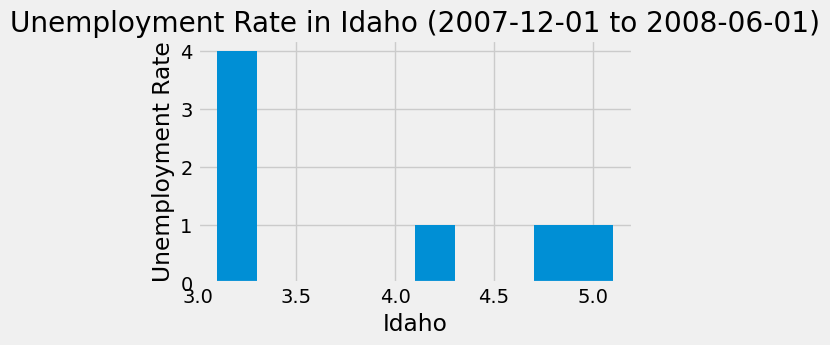

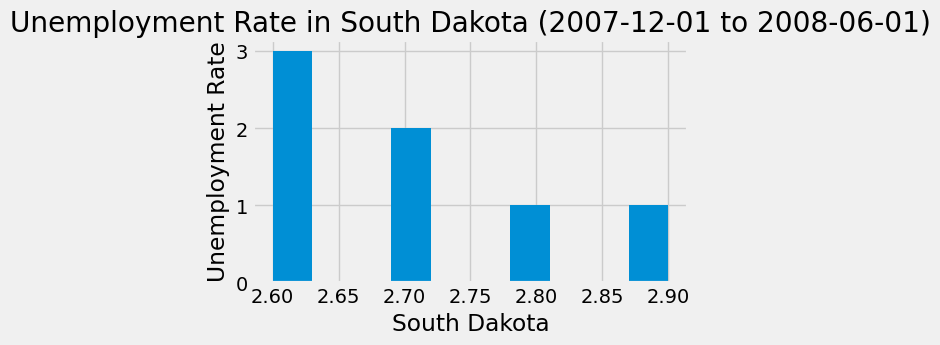

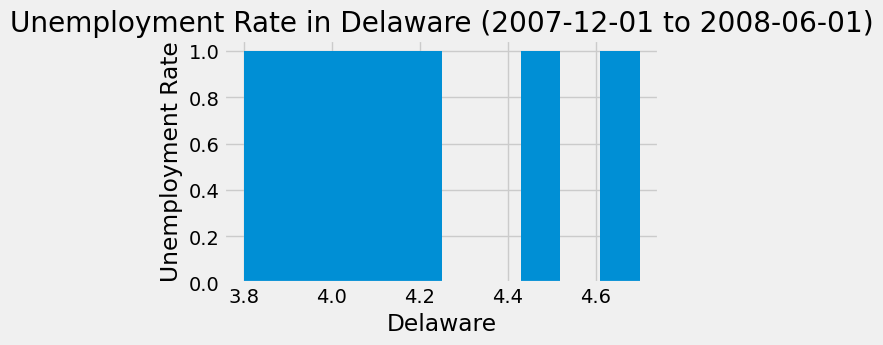

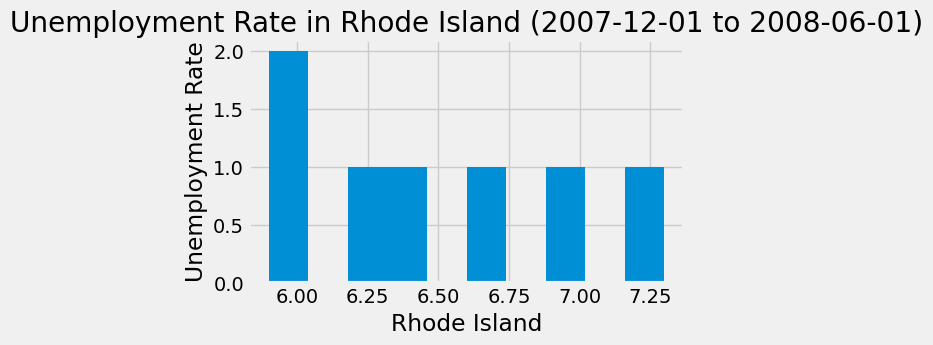

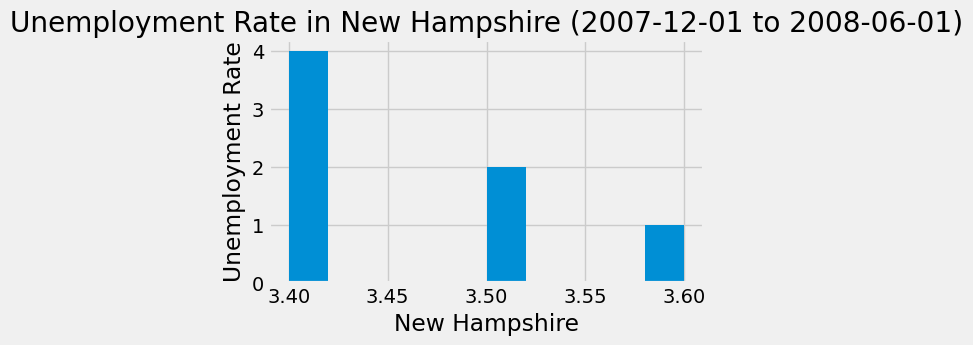

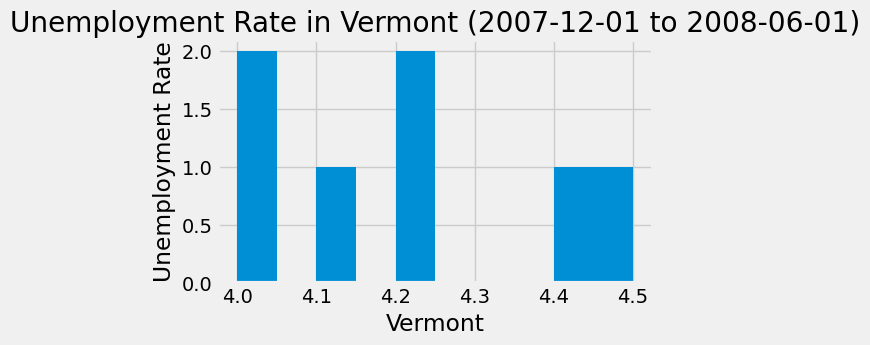

In [230]:

unemp_2008 = unemp.loc['2007-12-01':'2008-06-01']

for state in unemp_2008.columns:
    plt.figure(figsize=(5, 3))
    plt.hist(unemp_2008[state])
    plt.xlabel(state)
    plt.ylabel('Unemployment Rate')
    plt.title(f'Unemployment Rate in {state} (2007-12-01 to 2008-06-01)')
    plt.show()


# Plot Unemployment vs Participation for each state!


In [239]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [240]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # it's better to not request to fast or will get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

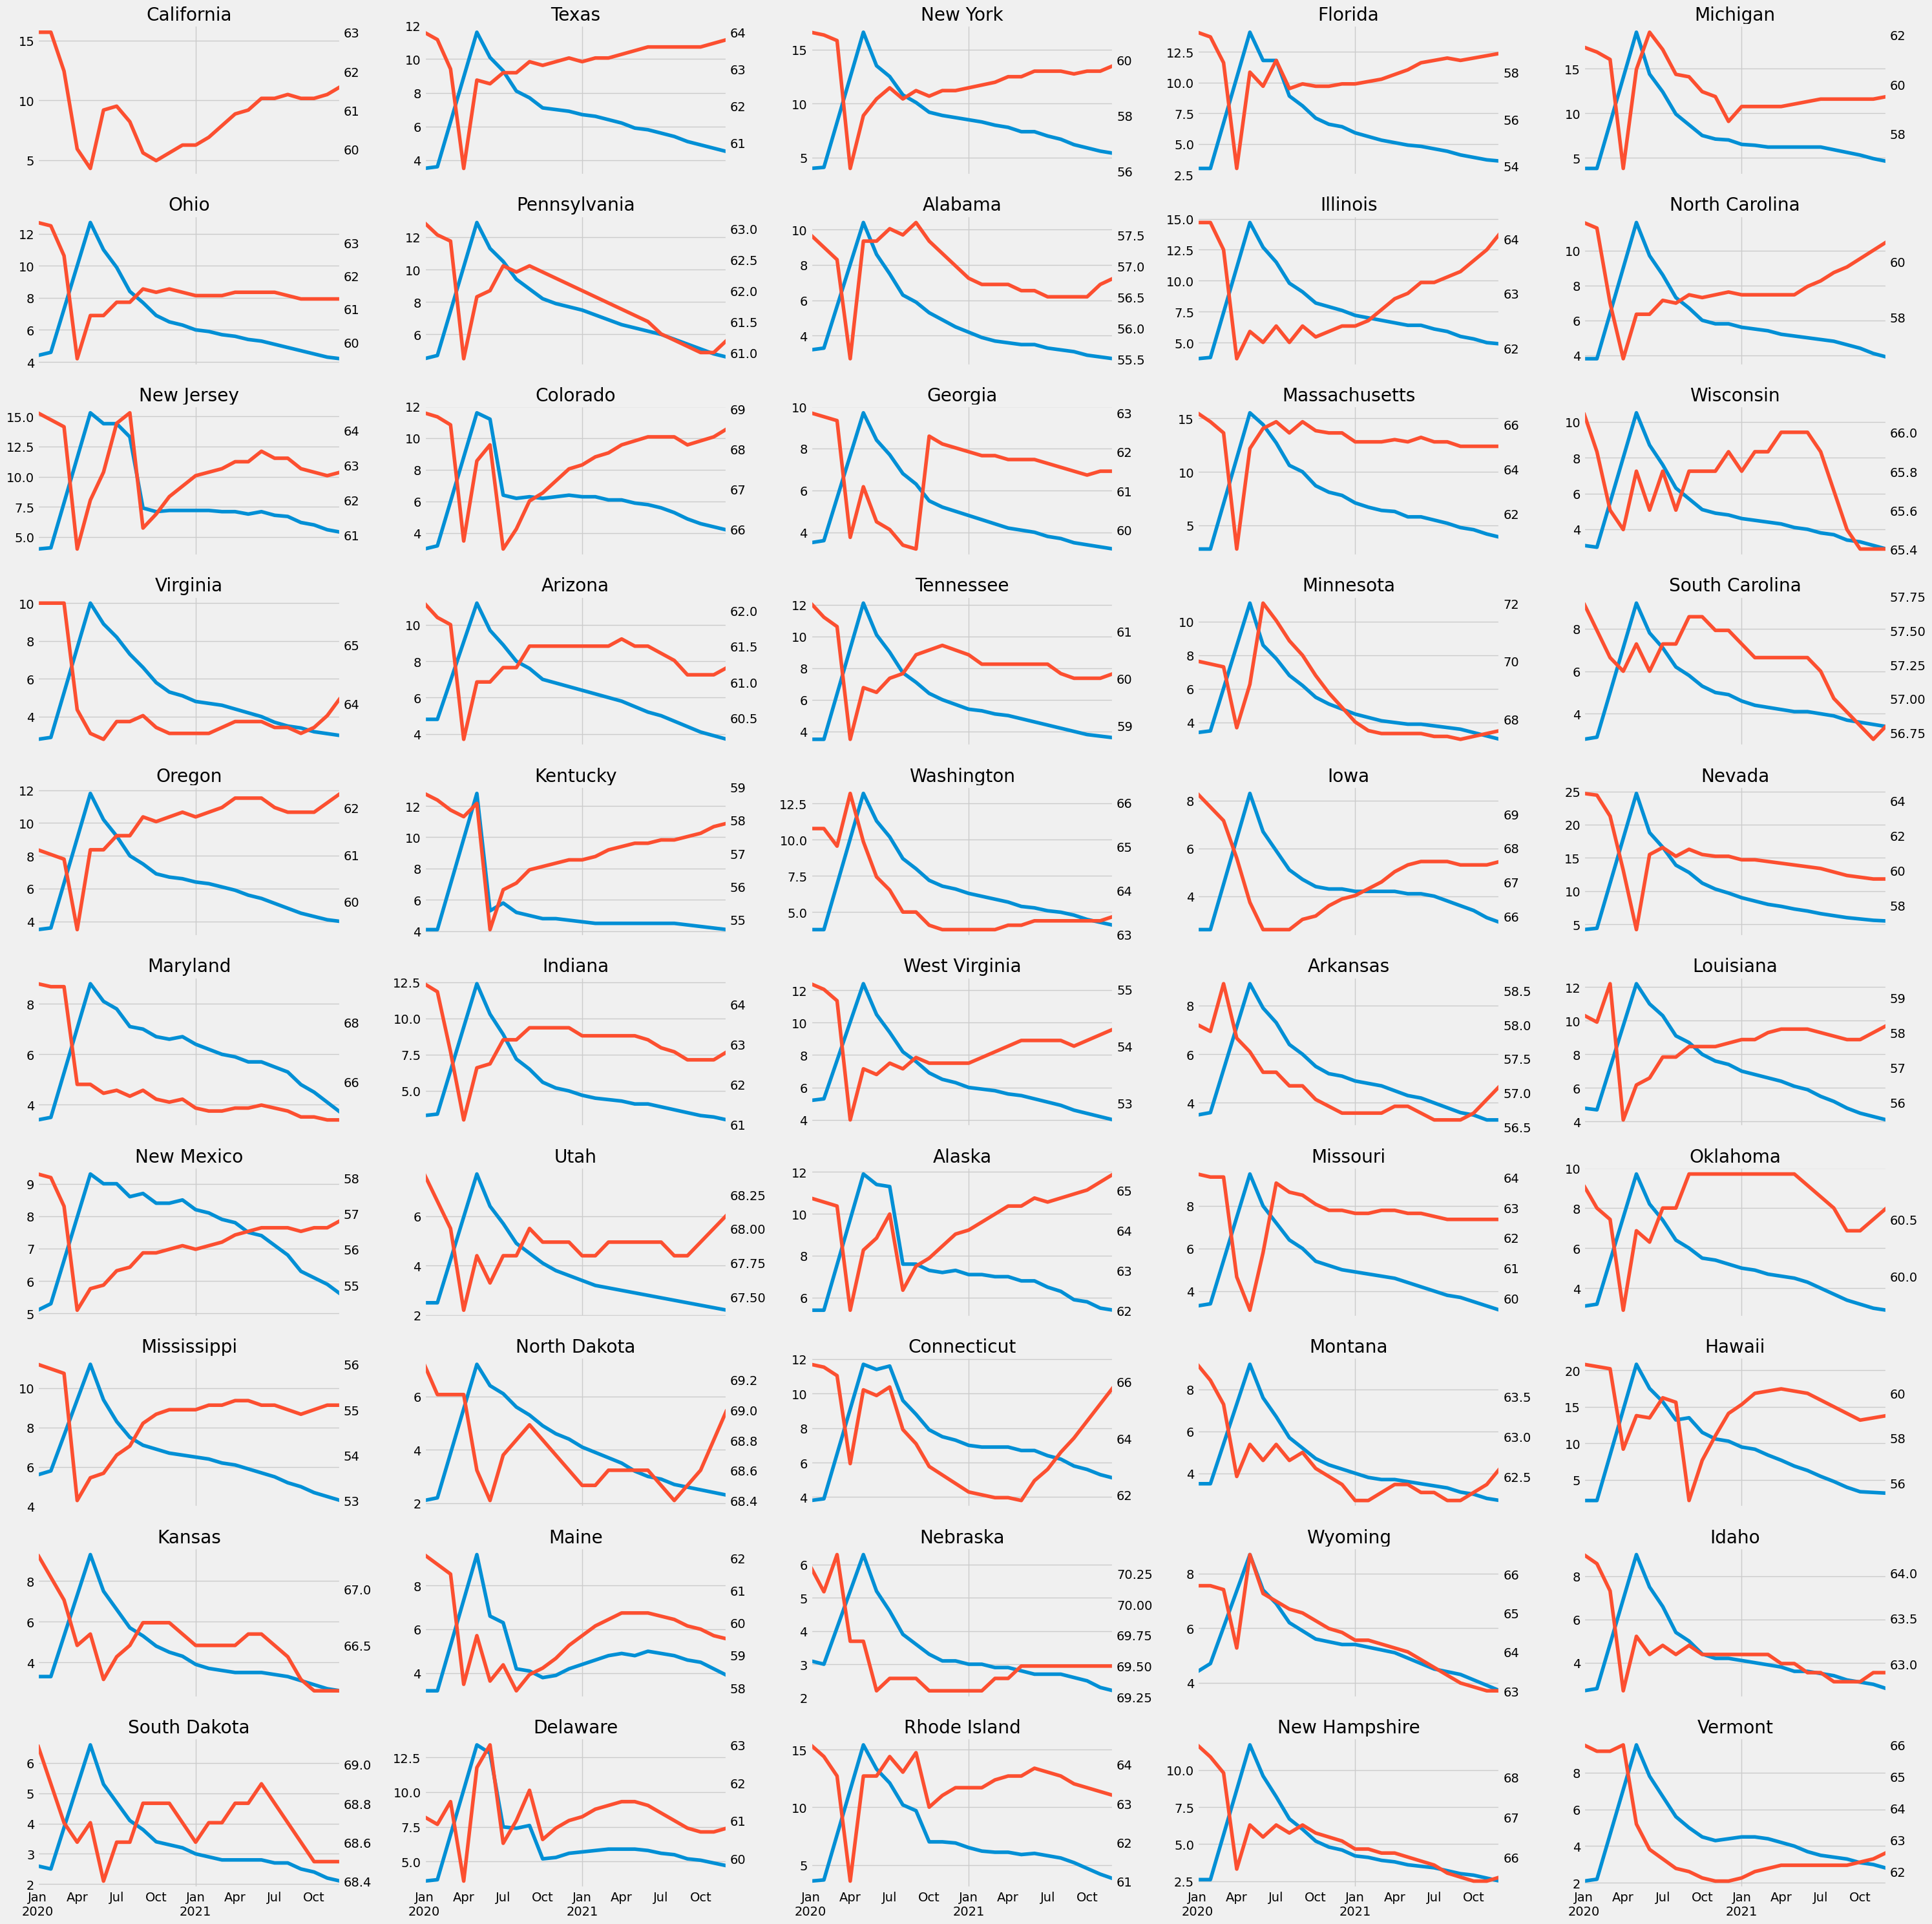

In [243]:
unemp_= unemp.rename(columns={'the District of Columbia':'District Of Columbia'})
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unemp_.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_palette[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

we notice california didn't have an unemployement rate

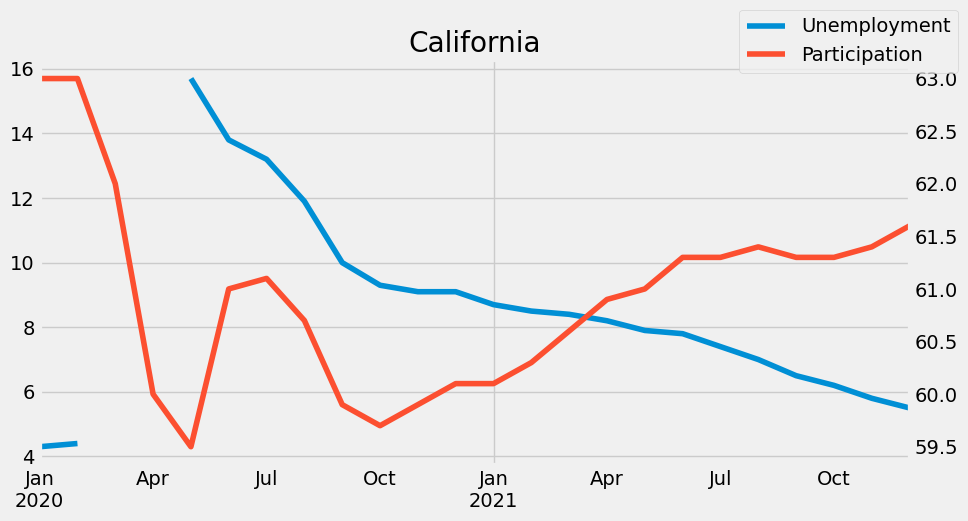

In [246]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
unemp_cali= unemp_.asfreq('MS')
l1 = unemp_cali.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_palette[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()